In [86]:
import os
os.chdir('/het/p4/ramirez/gcewavelets/skysearch/code/')

import numpy as np
import sys, os
import _maps as maps

import healpy as hp
import astropy_healpix

import matplotlib.pyplot as plt
import matplotlib as mpl


from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import data, img_as_float

In [87]:
# load local directory
username="ramirez"
local_dir = "/het/p4/"+username+"/gcewavelets/skysearch/"
maps_dir = "/het/p4/"+username+"/gcewavelets/skysearch/data/maps/"

# ---
 # Block: Specify map ids
model = 'ilias_60x60' # only available option: SA0
trial_id = str(0)
model_dir = maps_dir + (model + '_' + trial_id + '/')
energy_bin = '16'
map_type = 'all'

# inj_ids
inj_id_list = [1008,1009,1010,1015,1020,1025,1030,1035]
N_counts_list = [8,9,10,15,20,25,30,35]

n_inj = 2
inj_id = str(inj_id_list[n_inj])
N_counts = N_counts_list[n_inj]

# load events from map 
if energy_bin == 'all' or energy_bin == str(-1):
    if map_type == 'bkgd':
        map_dir = model_dir + 'bkgd/'
    elif map_type == 'all' or map_type == 'ps':
        map_dir = model_dir + ('bkgd_wps_' + inj_id + '/') 
else:
    ie = int(float(energy_bin))
    if map_type == 'bkgd':
        bkgd_dir = model_dir + 'bkgd/'
        map_dir = bkgd_dir + 'energy_bin_' + str(ie) + '/'
    elif map_type == 'all' or map_type == 'ps':
        bkgd_wps_dir = model_dir + ('bkgd_wps_' + inj_id + '/')
        map_dir = bkgd_wps_dir + 'energy_bin_' + str(ie) + '/'  

data_dir = map_dir + 'projected_maps/'
# ---

# load father pixel and data
npix = 112
patch_dir = data_dir + 'map_' + str(npix) + '/'

In [88]:
a_deg = 0.2
str_a_deg = str.format('{0:.5f}',a_deg)

wavelet_name = 'mexh'
grid_scale_deg = 0.1
str_grid_scale_deg = str.format('{0:.4f}',grid_scale_deg)
file_name = wavelet_name + '_' + 'coefficient_map' + '_' + str_a_deg + '_' + str_grid_scale_deg + '.npy'
cwt_map_wps = np.load(patch_dir + file_name, allow_pickle = True)

file_name_ps = wavelet_name + '_' + 'ps_coefficient_map' + '_' + str_a_deg + '_' + str_grid_scale_deg + '.npy' 
cwt_map_ps = np.load(patch_dir + file_name_ps, allow_pickle = True)

# decided to separate grid and projected maps into two different dictionaries
# grid is defined using the total background map for all energies
bkgd_patch_dir_all_energies = model_dir + 'bkgd/' + 'energy_bin_' + str(ie) + '/' + 'projected_maps/' + 'map_' + str(npix) + '/'
grid_dict = dict(np.load(bkgd_patch_dir_all_energies + 'grid_dict_' + str_grid_scale_deg + '_' + '.npz'))
mesh_bxby = grid_dict['rectangular_grid']
grid = grid_dict['grid']
cwt_map_bkgd = np.load(bkgd_patch_dir_all_energies + file_name, allow_pickle = True)

In [89]:
data = projected_map['outmost_region_points']
mesh_bxby = grid_dict['rectangular_grid']
grid = grid_dict['grid']

In [90]:
r_out_edge = projected_map['outer_region_edge']
x_out_edge = r_out_edge[:,0] ; y_out_edge = r_out_edge[:,1]
bx_min, bx_max, by_min, by_max = [np.min(x_out_edge), np.max(x_out_edge),
                                  np.min(y_out_edge), np.max(y_out_edge)]

In [91]:
scale = 0.1 * np.pi / 180
step_size = scale 
mesh_bxby, arr_b, arr_bx_plot, arr_by_plot = maps.build_mesh_(bx_min, bx_max, by_min, by_max, step_size, step_size, return_arrays_for_plotting=True)

(-0.22575039922668377,
 0.2262898770398482,
 -0.20317234408792986,
 0.2034893716267495)

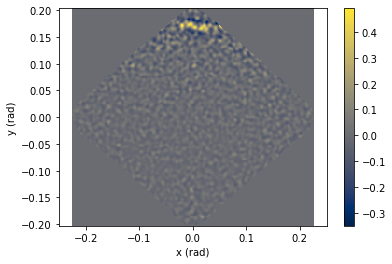

In [92]:
fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map_bkgd[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.min(cwt_map_bkgd[:,:,0]), 
                                                 vmax=np.max(cwt_map_bkgd[:,:,0])))
plt.colorbar(plot)
plt.xlabel('x (rad)')
plt.ylabel('y (rad)')
ax.axis('equal')

(-0.22575039922668377,
 0.2262898770398482,
 -0.20317234408792986,
 0.2034893716267495)

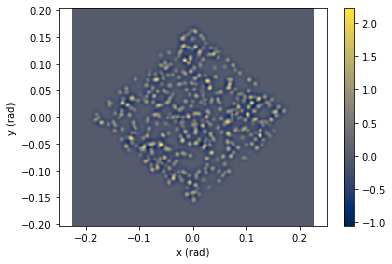

In [93]:
fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map_ps[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.min(cwt_map_ps[:,:,0]), 
                                                 vmax=np.max(cwt_map_ps[:,:,0])))
plt.colorbar(plot)
plt.xlabel('x (rad)')
plt.ylabel('y (rad)')
ax.axis('equal')

(-0.22575039922668377,
 0.2262898770398482,
 -0.20317234408792986,
 0.2034893716267495)

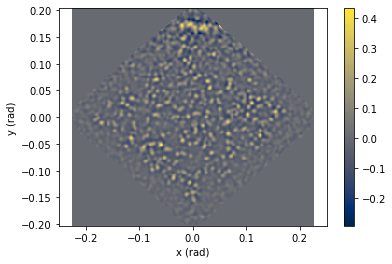

In [94]:
fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map_wps[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.min(cwt_map_wps[:,:,0]), 
                                                 vmax=np.max(cwt_map_wps[:,:,0])))
plt.colorbar(plot)
plt.xlabel('x (rad)')
plt.ylabel('y (rad)')
ax.axis('equal')

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


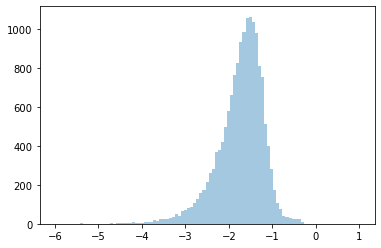

In [95]:
cwt_flat = cwt_map_bkgd[:,:,0].flatten()
bins = np.linspace(-6,1,100)
counts_bkgd, bins, _ = plt.hist(np.log10(cwt_flat), bins = bins, alpha = 0.4)

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


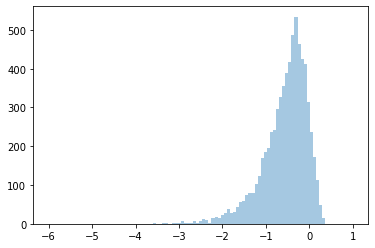

In [96]:
cwt_flat_ps = cwt_map_ps[:,:,0].flatten()
bins = np.linspace(-6,1,100)
counts_wps, bins, _ = plt.hist(np.log10(cwt_flat_ps), bins = bins, alpha = 0.4)

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


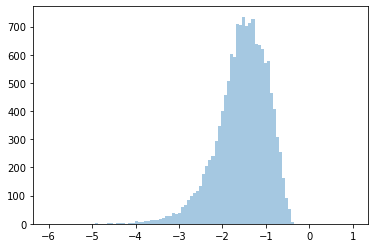

In [97]:
cwt_flat_wps = cwt_map_wps[:,:,0].flatten()
bins = np.linspace(-6,1,100)
counts_wps, bins, _ = plt.hist(np.log10(cwt_flat_wps), bins = bins, alpha = 0.4)

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the i

Text(0, 0.5, 'N')

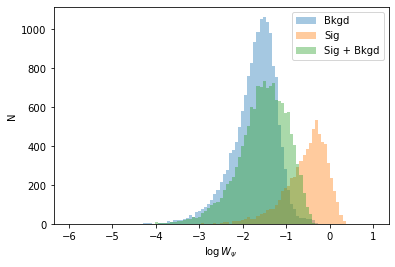

In [98]:
counts_bkgd, bins, _ = plt.hist(np.log10(cwt_flat), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_wps, bins, _ = plt.hist(np.log10(cwt_flat_ps), bins = bins, alpha = 0.4, label = 'Sig')
counts_wps, bins, _ = plt.hist(np.log10(cwt_flat_wps), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
plt.legend()
plt.xlabel('$\log W_\psi$')
plt.ylabel('N')

In [99]:
# load father pixels and edge
NSIDE = 4
NPIX = hp.nside2npix(NSIDE)
arr_edge_points = maps.healpix_edge_generator_(NSIDE = 4, step = 100)

# load point source locations
ps_loc_dir = map_dir = bkgd_wps_dir 
events_loc = np.load(ps_loc_dir + 'ps_loc.npy', allow_pickle = True)
l_events_loc = events_loc[:,0]
b_events_loc = events_loc[:,1]

phi_events_loc = l_events_loc.copy()
phi_events_loc[phi_events_loc>np.pi] = phi_events_loc[phi_events_loc>np.pi]-2*np.pi

lon_events_loc = phi_events_loc + np.pi
lat_events_loc = b_events_loc

## group points into father pixels
grouped_loc_lon, grouped_loc_lat = maps.divide_data_into_groups_(lon_events_loc, lat_events_loc, arr_edge_points)

# load point source locations
lon_events_loc_npix = grouped_loc_lon[npix]
lat_events_loc_npix = grouped_loc_lat[npix]

# project point source locations to father pixel
lon_c, lat_c = projected_map['center_coords']
r_loc = np.array(maps.tangent_plane_proj_(lat_events_loc_npix, lon_events_loc_npix, lat_c, lon_c))
N_ps = r_loc.shape[0]

In [100]:
# load psf degree and grid scale
psf_degree = 0.17    # dependent on father pixel (should use maps.psf_ fct)
psf_scale = psf_degree * np.pi / 180
grid_scale = 0.1 * np.pi / 180
N_pix_psf = int(psf_scale / grid_scale)

(233, 259, 1)

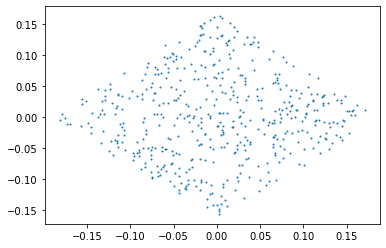

In [101]:
plt.plot(r_loc[:,0], r_loc[:,1], 'o', markersize = 1)
cwt_map_wps.shape

[ 0.05741751 -0.07341853]
(74, 162)


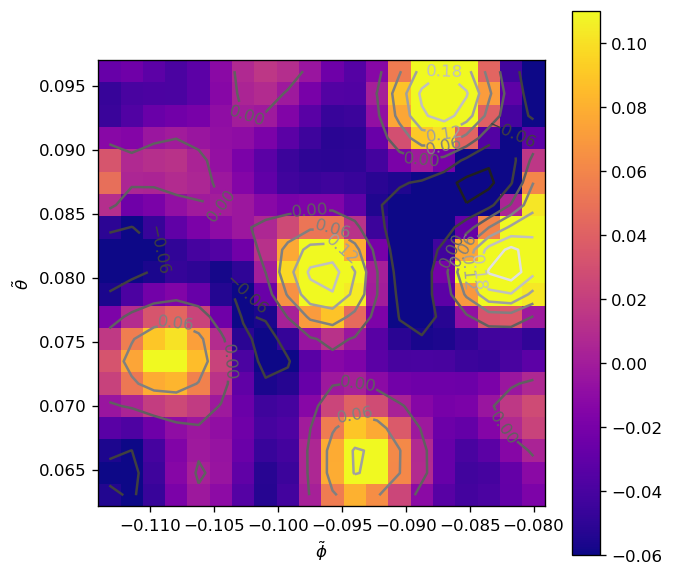

In [102]:
arr_bx = 0.5 * (arr_bx_plot[:-1] + arr_bx_plot[1:])
arr_by = 0.5 * (arr_by_plot[:-1] + arr_by_plot[1:])

point = r_loc[30,:]
buf_point = point[np.newaxis, np.newaxis]
print(point)

index = maps.closest_grid_point_(point, mesh_bxby)
nx = index[0]
ny = index[1]
print(index)

# plot colormesh around the point source
nx_low = nx-10
nx_high = nx+10
ny_low = ny-10
ny_high = ny+10

arr_bx_plot_ps = arr_bx_plot[nx_low:nx_high+1]
arr_by_plot_ps = arr_by_plot[ny_low:ny_high+1]
arr_bx_ps = arr_bx[nx_low:nx_high]
arr_by_ps = arr_by[ny_low:ny_high]

cwt_map_wps_ps = cwt_map_wps[nx_low:nx_high,ny_low:ny_high,:]

fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plot = ax.pcolormesh(arr_bx_plot_ps, arr_by_plot_ps, cwt_map_wps_ps[:,:,0], cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
cset = ax.contour(arr_bx_ps, arr_by_ps, cwt_map_wps_ps[:,:,0], cmap='gray')
ax.clabel(cset, inline=True)

plt.colorbar(plot)
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

Drawing_colored_circle = plt.Circle(( point[0] , point[1] ), 2*psf_scale, ec = 'white', fc = 'None', lw = 2)
ax.add_artist( Drawing_colored_circle )

In [103]:
cwt_sig = np.empty(shape = (1))
Nps = r_loc.shape[0]
effective_ps_size = 6 * psf_scale
for n in range(Nps):
    index = maps.closest_grid_point_(point, mesh_bxby)
    nx = index[0]
    ny = index[1]

    closest_point = mesh_bxby[index]
    buf_closest_point = closest_point[np.newaxis, np.newaxis]
    relative_positions = buf_closest_point - mesh_bxby
    distances = np.linalg.norm(relative_positions, axis = -1)
    indices = np.where(distances < effective_ps_size)
    kx = indices[0]
    ky = indices[1]

    cwt_sig_single = cwt_map_wps[kx,ky][:,0]
    cwt_sig = np.concatenate((cwt_sig, cwt_sig_single))

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after

Text(0, 0.5, 'N')

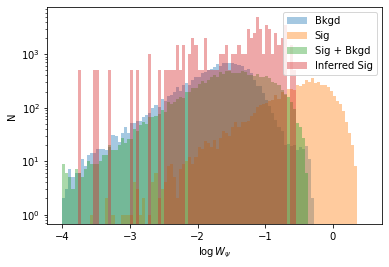

In [104]:
bins = np.linspace(-4,0.5,100)
counts_bkgd, bins, _ = plt.hist(np.log10(cwt_flat), bins = bins, alpha = 0.4, label = 'Bkgd', log = True)
counts_ps, bins, _ = plt.hist(np.log10(cwt_flat_ps), bins = bins, alpha = 0.4, label = 'Sig', log = True)
counts_wps, bins, _ = plt.hist(np.log10(cwt_flat_wps), bins = bins, alpha = 0.4, label = 'Sig + Bkgd', log = True)
counts_wps_ps, bins, _ = plt.hist(np.log10(cwt_sig), bins = bins, alpha = 0.4, label = 'Inferred Sig', log = True)
plt.legend()
plt.xlabel('$\log W_\psi$')
plt.ylabel('N')

In [ ]:
Ny,Nx = mesh_bxby.shape[:-1]
grid_pix_flat = maps.find_points_inside_curve_(arr_b[:,0], arr_b[:,1], x_edge, y_edge, return_grid=True) # 2D array
grid_pix = grid_pix_flat.reshape((Ny,Nx))
grid_points = arr_b[grid_pix_flat,:]
N_grid = grid_points.shape[0]

